In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt, pi, exp
import cv2
import pywt
import pywt.data
from JPEGFUNC import *

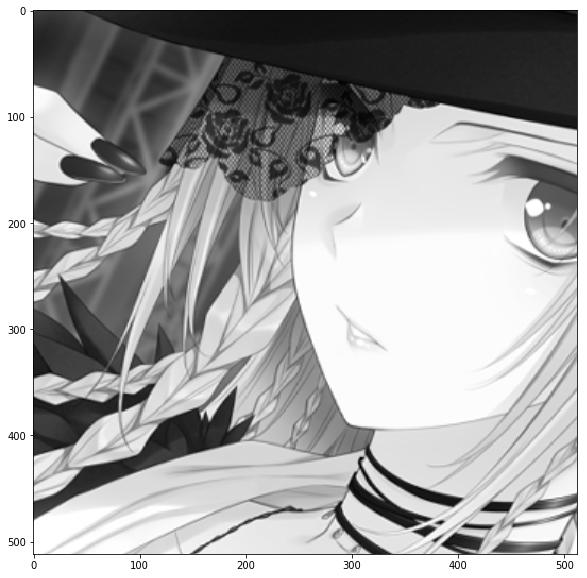

In [2]:
ori=Image.open("Saika.png")
arrayOri0=np.array(ori)
def show(pic):
    plt.figure(figsize=(20,10))
    plt.imshow(pic,cmap="gray")
arrayOri0=arrayOri0[200:200+512,600:600+512,:3].copy()
arrayOri=grayL(arrayOri0)
show(arrayOri)

In [3]:
def norm(LH):
    return np.uint8(LH/np.max(LH)*255)

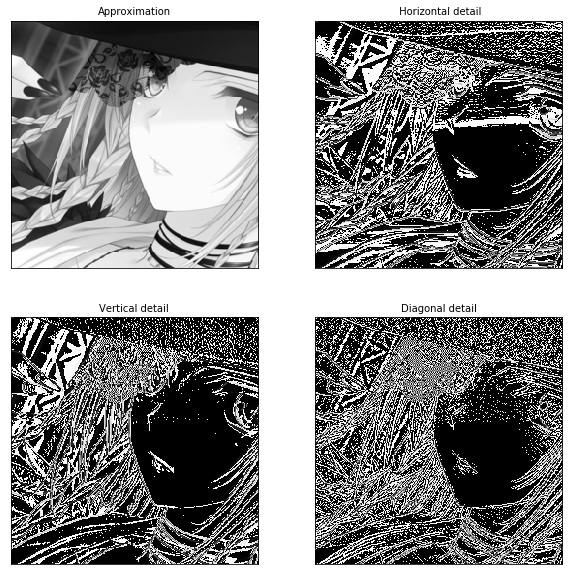

In [8]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
bases=["db1","haar"]
base=bases[0]
coeffs2 = pywt.dwt2(arrayOri, base)
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(10, 10))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
#     ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.imshow(norm(a), interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

# plt.subplots_adjust(wspace=-0.04, hspace=-0.01)
plt.show()

In [5]:
# Some features of pywt
pywt.wavedecn_shapes(arrayOri.shape, base, level=3)

[(64, 64),
 {'ad': (64, 64), 'da': (64, 64), 'dd': (64, 64)},
 {'ad': (128, 128), 'da': (128, 128), 'dd': (128, 128)},
 {'ad': (256, 256), 'da': (256, 256), 'dd': (256, 256)}]

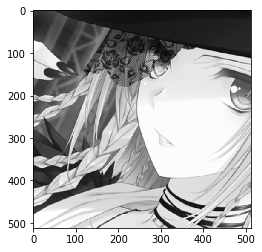

In [6]:
iimage2=pywt.idwt2([LL, (LH, HL, HH)],base)
plt.imshow(iimage2,"gray")

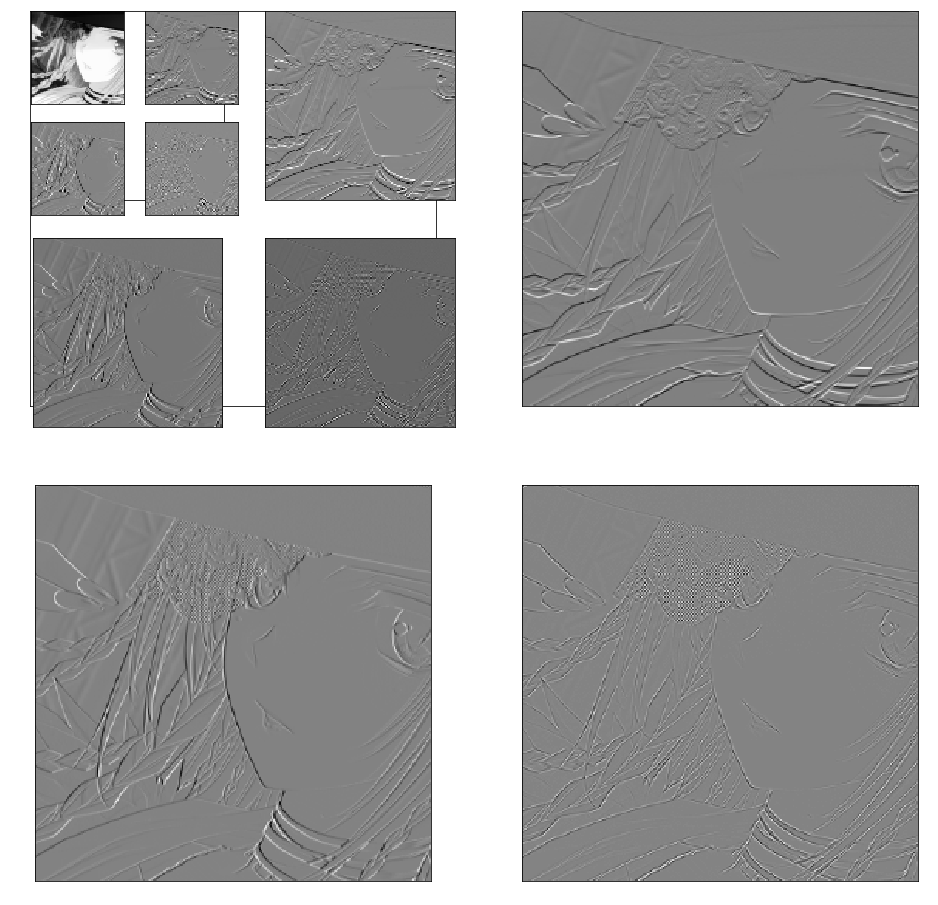

In [7]:
bases=["db1","haar"]
base=bases[1]
coeffs2 = pywt.wavedec2(arrayOri, base, level=3)
[cA3, (cH3, cV3, cD3), (cH2, cV2, cD2), (cH1, cV1, cD1)]=coeffs2
# [cA3, cH3, cV3, cD3, cH2, cV2, cD2, cH1, cV1, cD1]=list(map(norm,[cA3, cH3, cV3, cD3, cH2, cV2, cD2, cH1, cV1, cD1]))
fig=plt.figure(figsize=(16, 16))
plt.axis('off')
for i, a in enumerate([0, cH1, cV1, cD1]): # ]):#
    ax = fig.add_subplot(2, 2, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    if i!=0:
        ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    else:
        for j,b in enumerate([0, cH2, cV2, cD2]):
            ax = fig.add_subplot(4, 4, [1,2,5,6][j])
            ax.set_xticks([])
            ax.set_yticks([])
            if j!=0:
                ax.imshow(b, interpolation="nearest", cmap=plt.cm.gray)
            else:
                for n,c in enumerate([cA3, cH3, cV3, cD3]):
                    ax = fig.add_subplot(8, 8, [1,2,9,10][n])
                    ax.set_xticks([])
                    ax.set_yticks([])
                    ax.imshow(c, interpolation="nearest", cmap=plt.cm.gray)
# plt.subplots_adjust(wspace=-0.04, hspace=-0.01)
# plt.subplots_adjust(wspace=-0.05, hspace=0)
# plt.close()


In [10]:
def dwtSynthetic(coeffs2,n=64):
    dwt=np.empty((n*8,n*8))
    dwt[0:n,0:n]=coeffs2[0]
    for i in range(1,4):
        dwt[0:n,n:n+n]=coeffs2[i][0]
        dwt[n:n+n,0:n]=coeffs2[i][1]
        dwt[n:n+n,n:n+n]=coeffs2[i][2]
#         dwt[0:n,n:n+n]=norm(coeffs2[i][0])
#         dwt[n:n+n,0:n]=norm(coeffs2[i][1])
#         dwt[n:n+n,n:n+n]=norm(coeffs2[i][2])
        n*=2
    return dwt

In [11]:
# 注意imshow的plot方向
bases=["db1","haar"]
base=bases[1]
coeffs2 = pywt.wavedec2(arrayOri, base, level=3)
[cA3, (cH3, cV3, cD3), (cH2, cV2, cD2), (cH1, cV1, cD1)]=coeffs2
dwt_matrix=dwtSynthetic(coeffs2)

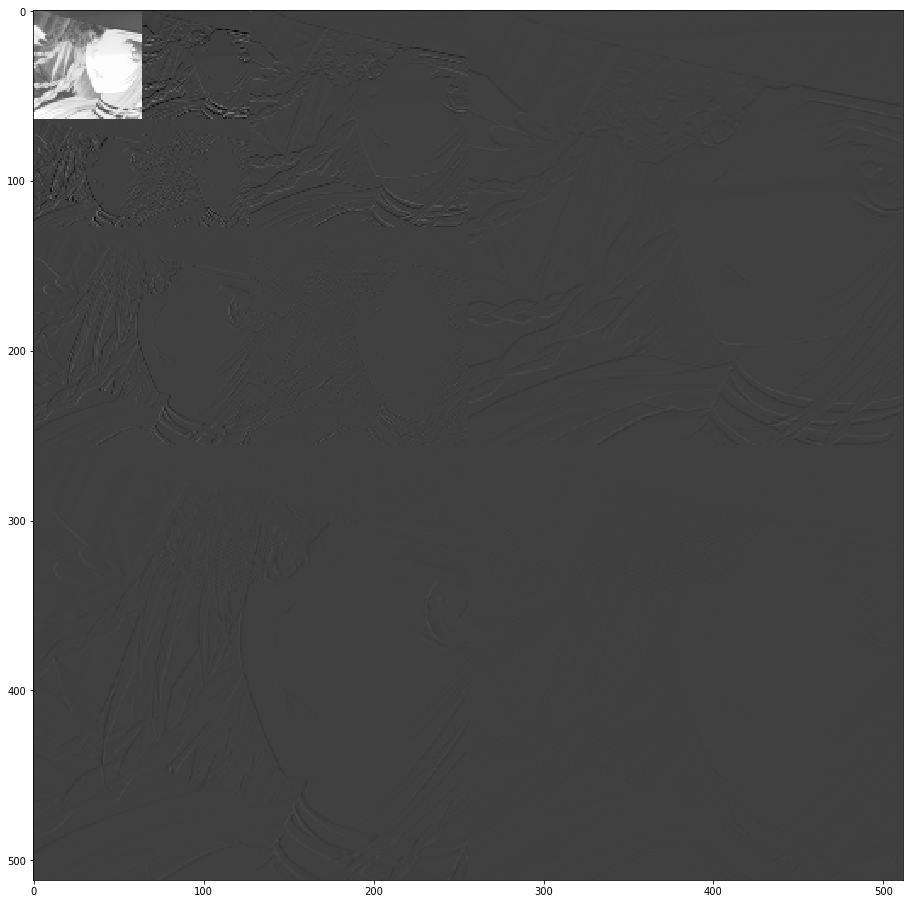

In [12]:
plt.figure(figsize=(16, 16))
plt.imshow(dwt_matrix,"gray")
# plt.imshow(dwt_matrix(coeffs2))

In [13]:
# Some features of pywt
pywt.wavedecn_shapes(arrayOri.shape, base, level=3)


[(64, 64),
 {'ad': (64, 64), 'da': (64, 64), 'dd': (64, 64)},
 {'ad': (128, 128), 'da': (128, 128), 'dd': (128, 128)},
 {'ad': (256, 256), 'da': (256, 256), 'dd': (256, 256)}]